In [12]:
cd Raw_data

[WinError 2] The system cannot find the file specified: 'Raw_data'
C:\Users\Xueho\Projects\Python_projects\Raw_data


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50

wnba = pd.read_csv("..\Raw_data\wnba.csv")
print('wnba_first_one: \n', wnba.head(1))
print('\nwnba_shape: ', wnba.shape)
parameter = max(wnba['Games Played'])
sample = wnba['Games Played'].sample(30, random_state = 1)
statistic = max(sample)
sampling_error = parameter - statistic
print('sampling_error: ', sampling_error)

wnba_first_one: 
             Name Team Pos  Height  Weight        BMI Birth_Place  \
0  Aerial Powers  DAL   F     183    71.0  21.200991          US   

          Birthdate  Age         College Experience  Games Played  MIN  FGM  \
0  January 17, 1994   23  Michigan State          2             8  173   30   

   FGA   FG%  15:00  3PA   3P%  FTM  FTA   FT%  OREB  DREB  REB  AST  STL  \
0   85  35.3     12   32  37.5   21   26  80.8     6    22   28   12    3   

   BLK  TO  PTS  DD2  TD3  
0    6  12   93    0    0  

wnba_shape:  (143, 32)
sampling_error:  2


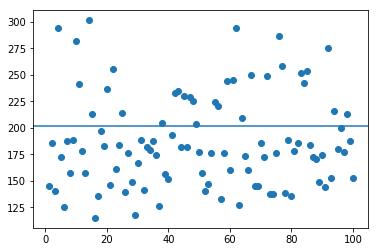

In [69]:
ls=[]
for i in range(100):
    avg = wnba['PTS'].sample(10, random_state=i).mean()
    ls.append(avg)
plt.scatter(x=range(1,101), y=ls)
plt.axhline(wnba['PTS'].mean())

In [70]:
# stratified sampling (stratum): organize our data set into different groups, 
#     then do simple random sampling for every group.
wnba['Pts_per_game']=wnba['PTS']/wnba['Games Played']
# Stratifying the data in five strata
stratum_G = wnba[wnba.Pos == 'G']
stratum_F = wnba[wnba.Pos == 'F']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba.Pos == 'F/C']  

strata = [(stratum_G, 'G'),  (stratum_F, 'F'), (stratum_C, 'C'), (stratum_GF, 'GF'), \
          (stratum_FC, 'FC')]
avgs={}
for item, key in strata:
    avg = item['Pts_per_game'].sample(10, random_state = 0).mean()
    avgs[key] = avg
position_most_points = max(avgs, key = avgs.get)
print(position_most_points)

C


In [71]:
wnba['Games Played'].value_counts(bins = 3, normalize = True)
# count values in three ranges

(22.0, 32.0]     0.727273
(12.0, 22.0]     0.181818
(1.969, 12.0]    0.090909
Name: Games Played, dtype: float64

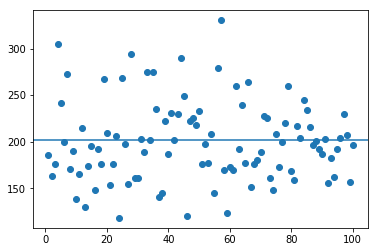

In [72]:
'''
wnba['Games Played'].value_counts(bins = 3, normalize = True)
# count values in three ranges
under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_23 = wnba[wnba['Games Played'] > 22]

proportional_sampling_means=[]
for i in range(100):
    sample_under_12 = under_12['PTS'].sample(1, random_state=i)
    sample_btw_13_22 = btw_13_22['PTS'].sample(2, random_state=i)
    sample_over_23 = over_23['PTS'].sample(7, random_state=i)
    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_23])           
    proportional_sampling_means.append(final_sample.mean())
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())
'''

In [ ]:
# Porportional sampling above din't perform better than simple random sampling

In [73]:
strata = wnba['MIN'].value_counts(bins = 3, normalize = True)
print(strata)

(347.333, 682.667]    0.349650
(10.993, 347.333]     0.335664
(682.667, 1018.0]     0.314685
Name: MIN, dtype: float64


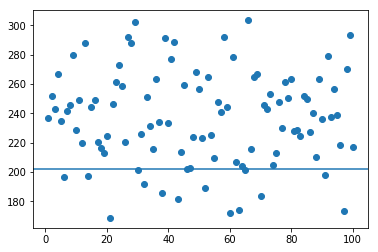

In [93]:
```
under_347_min = wnba[wnba['MIN'] <= 347]
btw_347_683 = wnba[(wnba['MIN'] > 347) & (wnba['Games Played'] <= 683)]
over_683 = wnba[wnba['MIN'] > 683]
proportional_sampling_means=[]
for i in range(100):
    sample_under_347_min = under_347_min['PTS'].sample(4, random_state=i)
    sample_btw_347_683 = btw_347_683['PTS'].sample(4, random_state=i)
    sample_over_683 = over_683['PTS'].sample(4, random_state=i)
    final_sample = pd.concat([sample_under_347_min, sample_btw_347_683, sample_over_683])
    proportional_sampling_means.append(final_sample.mean())
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())
```

In [96]:
# cluster sampling: each of the individual data sources is a cluster
# sample four clusters randomly
pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

6     PHO
11    IND
4     MIN
10    ATL
dtype: object

In [95]:
pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)
df1 = wnba[wnba['Team']=='PHO']
df2 = wnba[wnba['Team']=='IND']
df3 = wnba[wnba['Team']== 'MIN']
df4 = wnba[wnba['Team']=='ATL']
df = pd.concat([df1, df2, df3, df4])
height = df['Height'].mean()
age = df['Age'].mean()
BMI = df['BMI'].mean()
points = df['PTS'].mean()
sampling_error_height = wnba['Height'].mean() - height
sampling_error_age = wnba['Age'].mean() - age
sampling_error_BMI = wnba['BMI'].mean() - BMI
sampling_error_points = wnba['PTS'].mean() - points
print('sampling_error_height: ', sampling_error_height)
print('sampling_error_age: ', sampling_error_age)
print('sampling_error_BMI: ', sampling_error_BMI)
print('sampling_error_points: ', sampling_error_points)

sampling_error_height:  -0.06400121617511445
sampling_error_age:  -1.401337792642142
sampling_error_BMI:  0.23095444165950596
sampling_error_points:  -27.79674673152934


In [ ]:
# sampling methods: https://en.wikipedia.org/wiki/Sampling_(statistics)#Sampling_methods
# descriptive statistics: visualizing properties of the data through graphs
# inferential statistics: use a sample to draw conclusions about a population

In [7]:
# List variables measured on a nominal scale to a list, and sort the list
# wnba.info()
nominal_scale = sorted(['Name', 'Team', 'Pos', 'Birth_Place', 'College'])
print(nominal_scale)

['Birth_Place', 'College', 'Name', 'Pos', 'Team']


In [9]:
# sort the table by index ordererly using 
age_ascending = wnba['Age'].value_counts().sort_index(ascending=True)
age_descending = wnba['Age'].value_counts().sort_index(ascending=False)

In [ ]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'
    
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)
pts_ordinal_desc = wnba['PTS_ordinal_scale'].value_counts().iloc[[4, 3, 0, 2, 1, 5]]

In [15]:
# use kind = 'weak' to find the percentage of values thar are equal to or less than 
# the value specified in the score parameter
from scipy.stats import percentileofscore
print(percentileofscore(a = wnba['Age'], score = 23, kind = 'weak'))
# percentage of players played half the number of games or less
percentile_rank_half_less = percentileofscore(wnba['Games Played'], 17, kind ='weak')
#  percentage of players played more than half the number of games
percentage_half_more = 100 - percentileofscore(wnba['Games Played'], 17, kind ='weak')
print(percentile_rank_half_less)
print(percentage_half_more)

18.88111888111888
16.083916083916083
83.91608391608392


In [19]:
print(wnba['Age'].describe())

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64


In [20]:
print(wnba['Age'].describe().iloc[3:])

min    21.0
25%    24.0
50%    27.0
75%    30.0
max    36.0
Name: Age, dtype: float64


In [23]:
wnba = pd.read_csv('wnba.csv')
# upper quartile of the Age variable
age_upper_quartile = wnba['Age'].describe(percentiles = [.75])
# middle quartile of the Age variable
age_middle_quartile = wnba['Age'].describe(percentiles = [.5])
# 95th percentile of the Age variable
age_95th_percentile = wnba['Age'].describe(percentiles = [.95])
print(age_upper_quartile)
print('\n',age_middle_quartile)
print('\n',age_95th_percentile)

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64

 count    143.000000
mean      27.076923
std        3.679170
min       21.000000
50%       27.000000
max       36.000000
Name: Age, dtype: float64

 count    143.000000
mean      27.076923
std        3.679170
min       21.000000
50%       27.000000
95%       34.000000
max       36.000000
Name: Age, dtype: float64


In [24]:
print(wnba['Weight'].value_counts(bins = 10).sort_index())

(54.941, 60.8]     5
(60.8, 66.6]      21
(66.6, 72.4]      10
(72.4, 78.2]      33
(78.2, 84.0]      31
(84.0, 89.8]      24
(89.8, 95.6]      10
(95.6, 101.4]      3
(101.4, 107.2]     2
(107.2, 113.0]     3
Name: Weight, dtype: int64


In [25]:
grouped_freq_table = wnba['PTS'].value_counts(bins = 10,
                normalize = True).sort_index(ascending = False)*100
print(grouped_freq_table)

(525.8, 584.0]     3.496503
(467.6, 525.8]     2.797203
(409.4, 467.6]     5.594406
(351.2, 409.4]     6.993007
(293.0, 351.2]     5.594406
(234.8, 293.0]    11.888112
(176.6, 234.8]    13.986014
(118.4, 176.6]    11.888112
(60.2, 118.4]     16.783217
(1.417, 60.2]     20.979021
Name: PTS, dtype: float64


In [ ]:
intervals = pd.interval_range(start = 0, end = 600, freq = 100)
print(intervals)
gr_freq_table = pd.Series([0,0,0,0,0,0], index = intervals)
print(gr_freq_table)
for value in wnba['PTS']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break
print(gr_freq_table)

In [26]:
intervals = pd.interval_range(start = 0, end = 600, freq = 60)
gr_freq_table_10 = pd.Series([0,0,0,0,0,0,0,0,0,0], index = intervals)
for value in wnba['PTS']:
    for interval in intervals:
        if value in interval:
            gr_freq_table_10.loc[interval] += 1
            break
print(gr_freq_table_10)

(0, 60]       30
(60, 120]     25
(120, 180]    17
(180, 240]    22
(240, 300]    15
(300, 360]     7
(360, 420]    11
(420, 480]     7
(480, 540]     4
(540, 600]     5
dtype: int64


In [57]:
import numpy as np
def lab(y):
    if y == 'R':
        return 'Rookie'
    elif float(y) <= 3.0:
        return 'Little experience'
    elif float(y) <= 5.0:
        return 'Experienced'
    elif float(y) <= 10.0:
        return 'Very experienced'
    else:
        return 'Veteran'
wnba['Exp_ordinal'] = wnba['Experience'].apply(lab)
wnba['Exp_ordinal'].value_counts()

Little experience    42
Very experienced     37
Experienced          25
Rookie               23
Veteran              16
Name: Exp_ordinal, dtype: int64

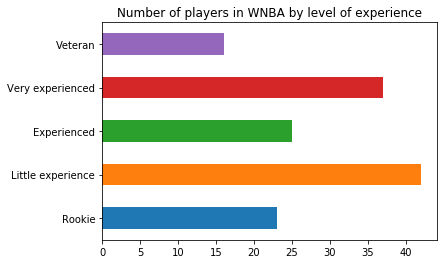

In [60]:
wnba['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]].plot.barh(title = 'Number of players in WNBA by level of experience')

Text(0,0.5,'')

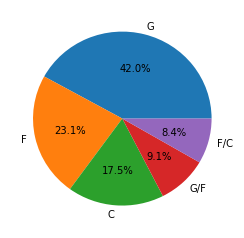

In [63]:
wnba['Pos'].value_counts().plot.pie(figsize = (4,4), autopct = '%.1f%%')
plt.ylabel('')

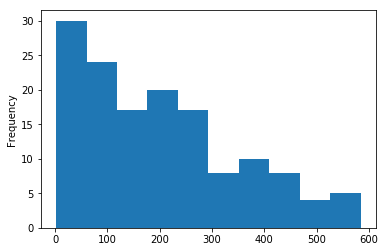

In [31]:
wnba['PTS'].plot.hist()

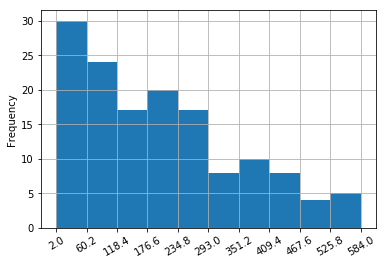

In [28]:
from numpy import arange
wnba['PTS'].plot.hist(grid = True, xticks = arange(2,585,58.2), rot = 30)

Text(0.5,0,'Games played')

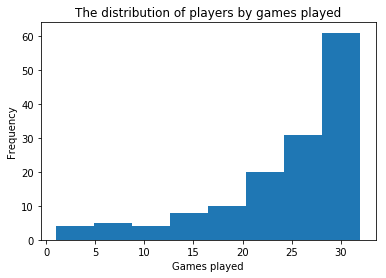

In [32]:
wnba['Games Played'].plot.hist(range = (1,32), bins=8, title='The distribution of players by games played')
plt.xlabel('Games played')

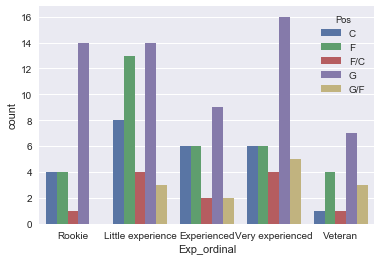

In [69]:
import seaborn as sns
sns.set()
sns.countplot(data = wnba, x = 'Exp_ordinal', hue = 'Pos', 
              order = ['Rookie', 'Little experience', 'Experienced', 'Very experienced', 'Veteran'],
              hue_order = ['C', 'F', 'F/C', 'G', 'G/F'])

average or above    73
below average       70
Name: min_mean_relative, dtype: int64

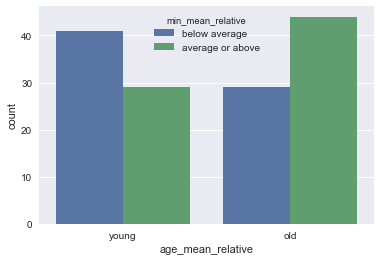

In [70]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else
                                           'below average')
sns.countplot(data=wnba, x='age_mean_relative', hue='min_mean_relative')
wnba['min_mean_relative'].value_counts()

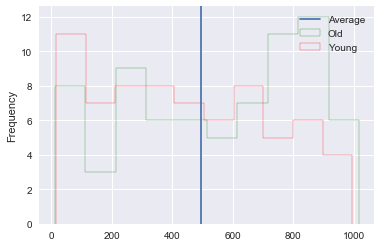

In [74]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True, color='green')
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True, color='red')
plt.axvline(x=497, label='Average')
plt.legend()

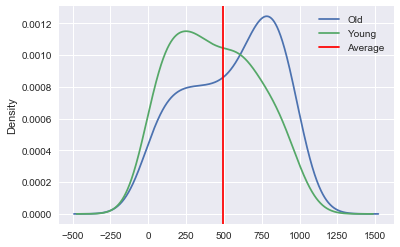

In [77]:
# kernel density estimate plot/kernel density plot
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.axvline(x=497, label='Average', color='red')
plt.legend()

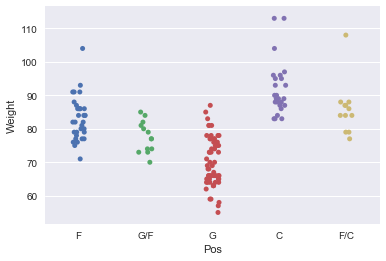

In [78]:
sns.stripplot(data=wnba, x='Pos', y='Weight', jitter=True)

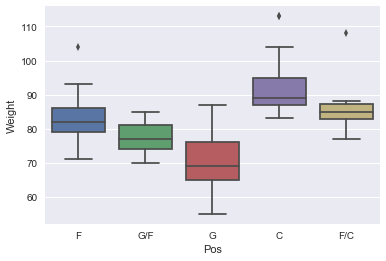

In [79]:
sns.boxplot(data=wnba, x='Pos', y='Weight')

In [82]:
iqr = 7
lower_bound = 11.5
upper_bound= 39.5
outliers_low = sum(wnba['Games Played'] < lower_bound) 
outliers_high = sum(wnba['Games Played'] > upper_bound)
print(outliers_low)
print(outliers_high)

12
0
